In [88]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import poissonImg

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


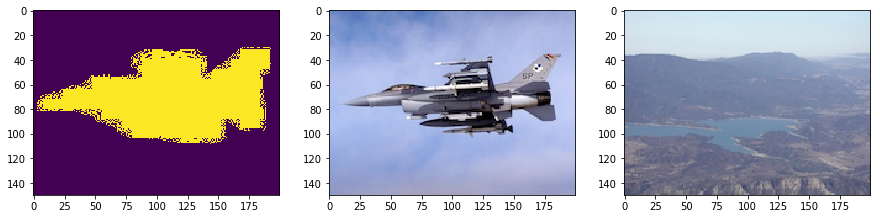

In [2]:
# read images
img_src = cv2.imread('source.jpg', cv2.IMREAD_COLOR)
img_dst = cv2.imread('target.jpg', cv2.IMREAD_COLOR)
img_mask = cv2.imread('mask.jpg', cv2.IMREAD_GRAYSCALE)

# normalize mask
img_mask = img_mask/255
img_mask[img_mask < 1] = 0

# bgr to rgb, float [0,1]
img_src = img_src[:,:,::-1].astype(np.float)/255
img_dst = img_dst[:,:,::-1].astype(np.float)/255

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_mask)
plt.subplot(1,3,2)
plt.imshow(img_src)
plt.subplot(1,3,3)
plt.imshow(img_dst)

In [3]:
# seamless cloning
channels = img_src.shape[-1]
# Call the poisson method on each individual channel
img_clone = [poissonImg.poisson_clone(img_src[:,:,i],img_dst[:,:,i],img_mask) for i in range(channels)]
# Merge the channels back into one image
img_clone = cv2.merge(img_clone)
#cv2.imwrite('./result.jpg',img_clone)

True

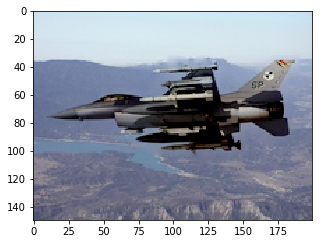

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(img_clone)

In [100]:
# gradient image integration
# reference: http://www.amitkagrawal.com/cvpr06/EdgeSuppression.html
im_flash = cv2.imread('flash_color.png', cv2.IMREAD_COLOR).astype(np.float)
im_flash = np.pad(im_flash,((1,1),(1,1),(0,0)),'constant')
H,W,C = im_flash.shape
im_recon = np.zeros((H,W,C))
for k in range(C):
    gx,gy = poissonImg.imgradient(im_flash[:,:,k])
    im_recon[:,:,k] = poissonImg.intgrad(gx,gy,np.zeros((H,W)))

In [ ]:
plt.figure(figsize=(8,16))
plt.subplot(121)
plt.imshow(im_flash/255)
plt.subplot(122)
plt.imshow(im_recon/14.1763165712/2+1)

In [97]:
print(np.min(im_recon[:]))
print(np.max(im_recon[:]))

0.0
4785756126.89
